## (7) Monitor and improve Virtual Agent performance through user satisfaction ratings and feedback
##### (GenAI Life Cycle Phase 7: Monitoring and Improvement self-practice)

#### **Case Scenario**
>
> CoffeePro’s virtual coffee concierge is now live and assisting users with personalized coffee recommendations. However, launching the virtual agent is just the beginning—ensuring its continuous improvement based on real user interactions is crucial. As users engage with the AI, their feedback, ratings, and behavioral data provide valuable insights into the assistant’s effectiveness, accuracy, and user satisfaction.
> 
> As the AI developer, your task is to implement a monitoring system that collects and analyzes feedback, allowing you to refine the virtual agent’s performance over time. This includes tracking response accuracy, identifying patterns in user satisfaction, and leveraging Retrieval-Augmented Generation (RAG) enhancements to improve recommendations. Additionally, the system should detect recurring issues, such as misinterpretations, biases, or inadequate responses, and provide mechanisms for updating the model accordingly.
> 
> Your Tasks:
>
> (a) Analyze feedback data 
Develop a structured approach to evaluate feedback trends, detect areas for improvement, and update the knowledge base accordingly.
> 
> (b) Refine model performance
Utilize insights from user ratings and comments to enhance response accuracy, personalize recommendations, and optimize the virtual agent’s conversational experience.
>
> By the end of this activity, you will have gained practical experience in monitoring AI performance, analyzing user feedback, and implementing continuous improvements to ensure CoffeePro’s virtual agent remains effective, reliable, and user-friendly.

---

#### (a) Analyze feedback data 


1. Access Visual Studio Code and the Jupyter Notebook prepared for this Practice Learning Activity <a href="../learning-files/ailtk-running-code-pla7.ipynb" target="_blank">(Click here to open Workbook: Practice Learning Activity 7 in Visual Studio Code)</a>

2. Provided to you is a spreadsheet `exported_data.xlsx` file containing exported Virtual Agent feedback records from a MySQL database. Run the code cell below to load the file into a pandas dataframe for our further analysis.

In [5]:
import pandas as pd

# LOAD EXCEL INTO DATAFRAME ----
excel_path = "../exported_data.xlsx"
df = pd.read_excel(excel_path)  # Read Excel into a DataFrame

# PRINT THE FIRST FEW ROWS ----
df.head()

,id,prompt,response,feedback_type,additional_feedback,created_at
0,1,Provide an example recipe for a tall black coffee,<p>There's no recipe for a tall black coffee b...,thumbs-up,NaN,2025-01-28 14:24:06
1,2,hello,<p>Hello there! How can I help you today?</p>\n,thumbs-down,test entry,2025-01-28 14:26:38
2,5,How can I get a refund for my coffee order?,"<p>Sorry, I’m not equipped to provide refund d...",thumbs-down,Needs better customer service integration,2025-01-28 14:20:00
3,6,Can I return a defective coffee maker?,"<p>I'm sorry, but I don’t have information on ...",thumbs-down,Frustrating experience,2025-01-28 14:25:45
4,7,How do I track my order?,"<p>Apologies, but I can’t access order trackin...",thumbs-down,Would be helpful if it could track orders,2025-01-28 14:30:10


> Your ourput should look something like this:
> 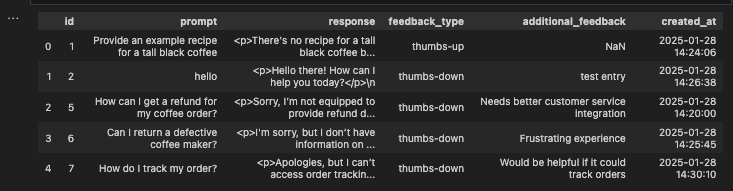

- From the head of the database we can see that it contains six columns: `id`, `prompt`, `response`, `feedback_type`, `additional_feedback`, and `created_at`. Three of the columns (`prompt`, `response`, and `additional_feedback`) are longer text entries. We can use wordclouds as tools for these types of data.
- Word clouds offer a quick visual overview of frequently used terms in LLP prompts, responses, and feedback, highlighting key themes and areas of focus. This is a useful tool for identifying dominant topics, recurring issues, or sentiment trends.  While helpful for summarizing large volumes of text, word clouds are more often that not used in conjunction with more detailed analysis to retain context and avoid misinterpretations.
- One thing to note is that `additional_feedback` is only collected for `thumbs-down` entries. Typically, feedback systems are designed to prioritize negative feedback.

3. First, we make a wordcloud for the `prompt` column by running the code below.

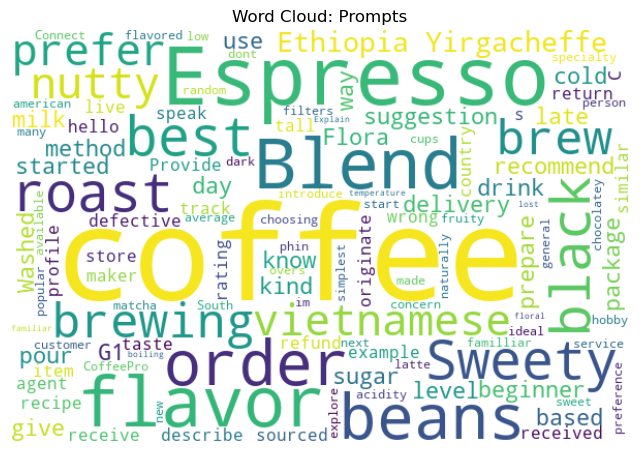

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ---- WORD CLOUD: PROMPTS ----
plt.figure(figsize=(8, 6))
prompt_text = " ".join(df["prompt"].dropna().astype(str))
wordcloud_prompt = WordCloud(width=600, height=400, background_color="white", colormap="viridis").generate(prompt_text)
plt.imshow(wordcloud_prompt, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Prompts")
plt.show()



> Your output should look something like this:
> 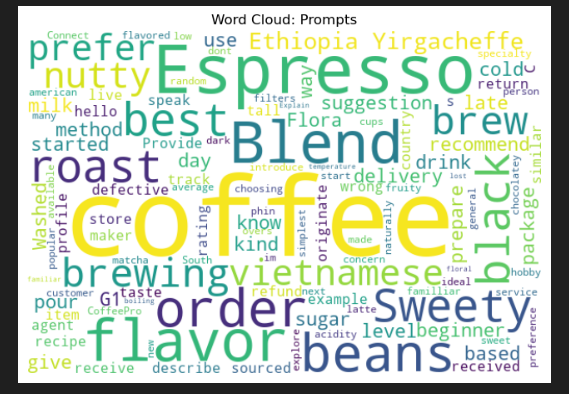

4. Second, we make a wordcloud for the `response` column by running the code below.

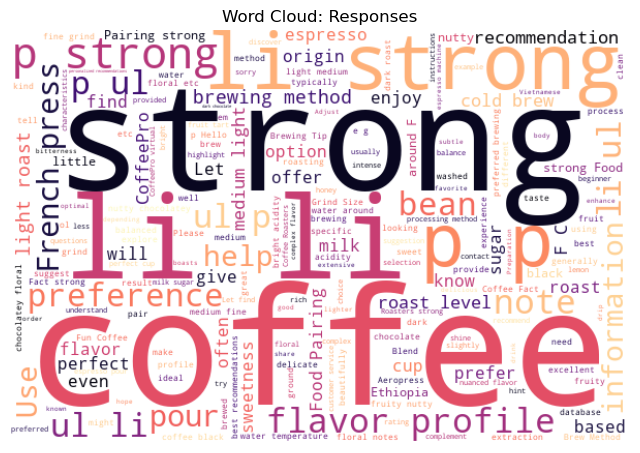

In [7]:

# ---- WORD CLOUD: RESPONSES ----
plt.figure(figsize=(8, 6))
response_text = " ".join(df["response"].dropna().astype(str))
wordcloud_response = WordCloud(width=600, height=400, background_color="white", colormap="magma").generate(response_text)
plt.imshow(wordcloud_response, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Responses")
plt.show()



> Your output should look something like this:
> 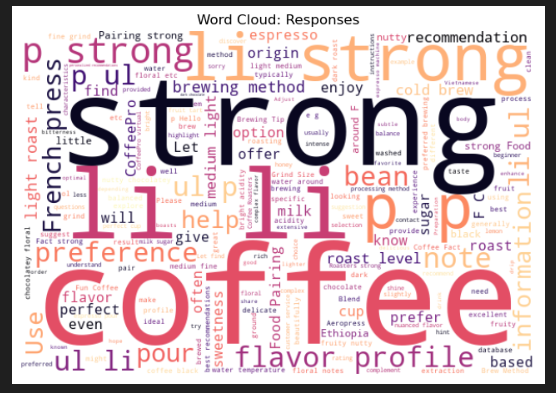

- Our primary concern when checking this column is whether or not the Virtual Agent has been safe and user-friendly. We can check this using Detoxify, similarly to what we previously did in Competency 5 (Evaluate models on use cases and for safety). Run the code cell below to compute for the toxicity scores of each entry and generate a heat map. Note that this may take a few minutes.

In [8]:
import pandas as pd
import numpy as np
from detoxify import Detoxify

# Initialize Detoxify model
detoxify_model = Detoxify('original')

# Parameters
toxicity_threshold = 0.5  # Threshold for flagging toxicity
toxicity_scores_list = []  # List to store toxicity scores

# Assuming df is your DataFrame, iterate over each row in the 'response' column
for i, response in enumerate(df['response']):
    # Evaluate the response for toxicity using Detoxify
    toxicity_scores = detoxify_model.predict(response)
    
    # Ensure scores are converted to standard Python float
    toxicity_scores = {key: float(value) for key, value in toxicity_scores.items()}
    print(f"Toxicity Scores for response {i}: {toxicity_scores}")
    
    # Store toxicity scores for visualization
    toxicity_scores_list.append(toxicity_scores)
    
    # Flagging responses with high toxicity or other unsafe attributes
    if any(score > toxicity_threshold for score in toxicity_scores.values()):
        print(f"Warning: Potentially unsafe content detected in response {i}.")
        print(f"Details: {toxicity_scores}")


Toxicity Scores for response 0: {'toxicity': 0.007069038227200508, 'severe_toxicity': 0.00012604235962498933, 'obscene': 0.00047966057900339365, 'threat': 0.00019934214651584625, 'insult': 0.000426253565819934, 'identity_attack': 0.0003595442685764283}
Toxicity Scores for response 1: {'toxicity': 0.0007066196994856, 'severe_toxicity': 0.00011825859837699682, 'obscene': 0.00017432711319997907, 'threat': 0.00013146118726581335, 'insult': 0.0001812097616493702, 'identity_attack': 0.000137457755045034}
Toxicity Scores for response 2: {'toxicity': 0.0006113248527981341, 'severe_toxicity': 0.00012360725668258965, 'obscene': 0.00017938320524990559, 'threat': 0.00013486937677953392, 'insult': 0.00017809156270232052, 'identity_attack': 0.0001379372552037239}
Toxicity Scores for response 3: {'toxicity': 0.0005956610548309982, 'severe_toxicity': 0.0001277187402592972, 'obscene': 0.00018040947907138616, 'threat': 0.0001394136343151331, 'insult': 0.0001763966283760965, 'identity_attack': 0.00014335

> Your output should look something like this:
> 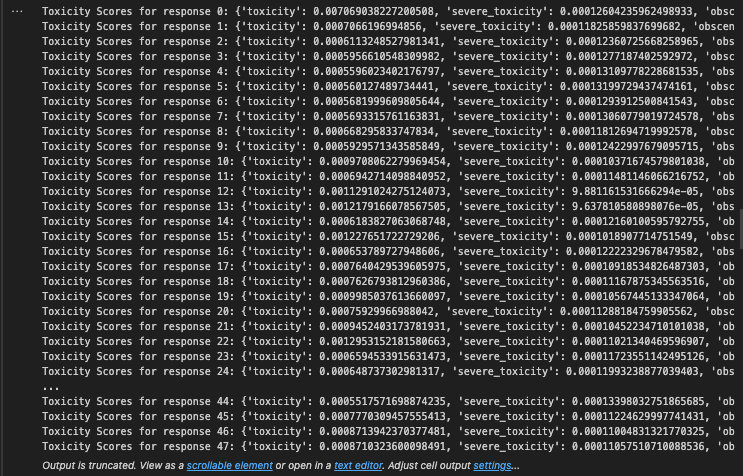

- Visualize the toxicity scores by running the code below:

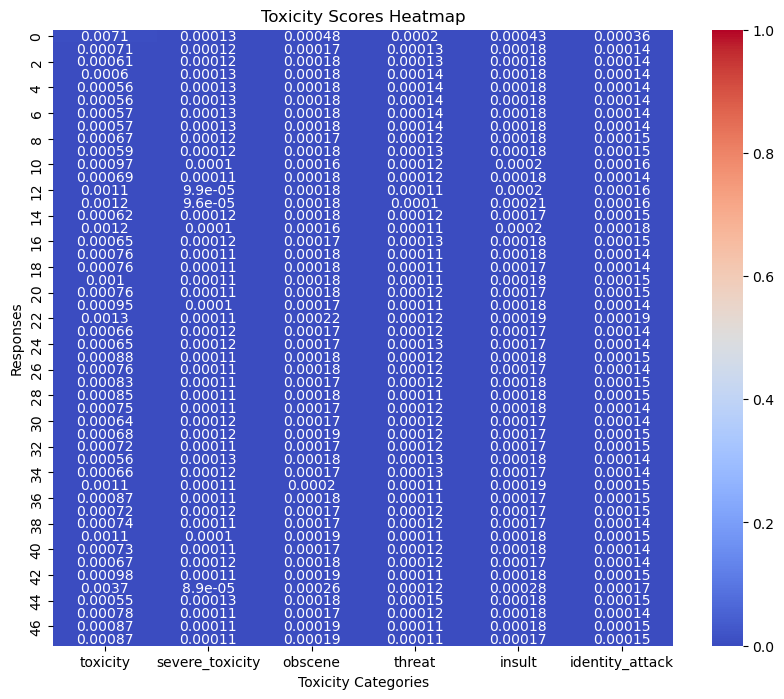

In [9]:
# Convert the list of toxicity scores to a DataFrame
toxicity_df = pd.DataFrame(toxicity_scores_list)

# Set up the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    toxicity_df, 
    annot=True,  
    cmap= sns.color_palette("coolwarm", as_cmap=True),
    vmin=0,  # Minimum value
    vmax=1,  # Maximum value
    cbar=True)

# Adding labels and title
plt.title('Toxicity Scores Heatmap')
plt.xlabel('Toxicity Categories')
plt.ylabel('Responses')

# Show the plot
plt.show()

> Your output should look something like this:
> 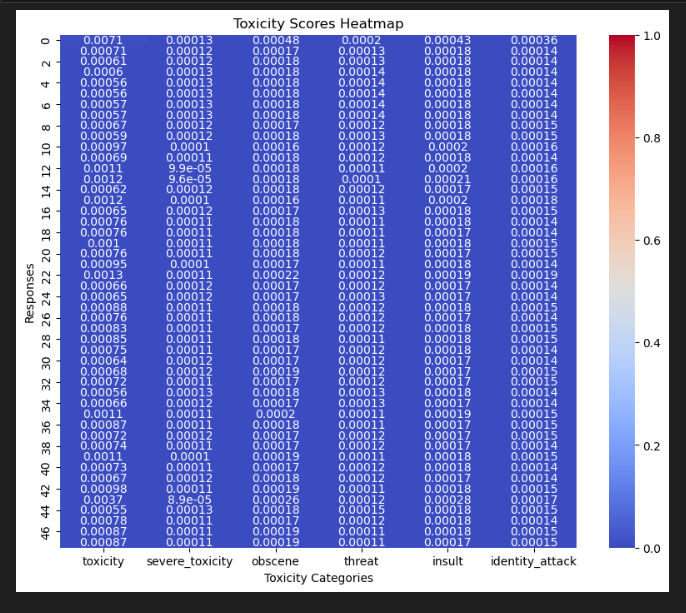

- From the Toxicity Score Heatmap we can see that none of the Virtual Agent's responses are problematic from a safety perspective. Since we are using a pre-trained model (Google Gemini), this result is expected, as such implementations undergo rigorous safety evaluations to mitigate the risk of generating toxic or harmful content.  However, it's still crucial to monitor and evaluate the model's performance in our specific use case to ensure continued safety.

5. The next column of intreset is the `feedback_type` distribution. From the head of the dataframe we were able to see that the entries consisted of either `thumbs-up` or `thumbs-down`. 

/var/folders/hj/877lyhb1715fltx1jm9dkwxw0000gn/T/ipykernel_13153/2772316600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="feedback_type", palette={"thumbs-up": "green", "thumbs-down": "red"})


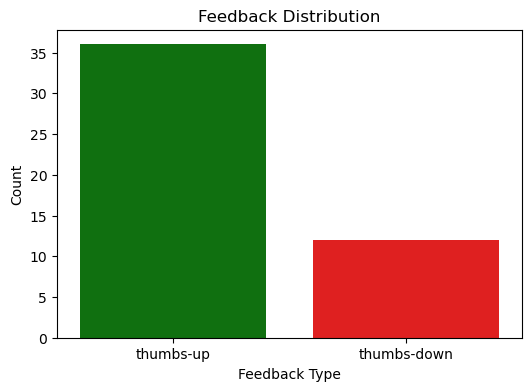

In [10]:

# ---- BAR GRAPH: 'thumbs-up' vs 'thumbs-down' ----
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="feedback_type", palette={"thumbs-up": "green", "thumbs-down": "red"})
plt.title("Feedback Distribution")
plt.xlabel("Feedback Type")
plt.ylabel("Count")
plt.show()

> Your output should look something like this:
> 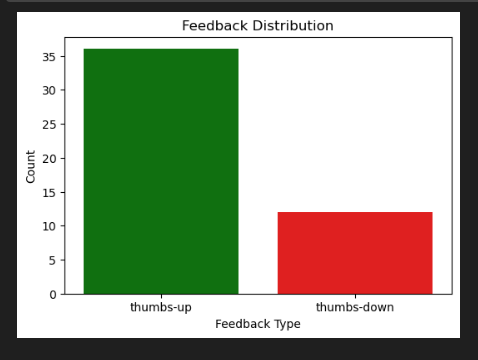

- Majority of the entries are positive (thumbs-up). Regardless, we should look into the negative (thumbs-down) to find any possible issues. We do so by looking further into the next column: `additional_feedback`

6. The next column of interest is the `additional_feedback`. We can give ourselves an idea of its contents by generating another word cloud.

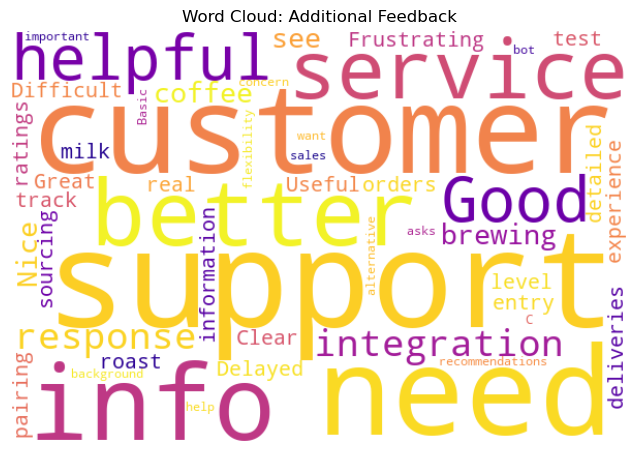

In [11]:
# ---- WORD CLOUD: ADDITIONAL FEEDBACK ----
plt.figure(figsize=(8, 6))

# Drop NaN entries
feedback_text = " ".join(df["additional_feedback"].dropna().astype(str))

wordcloud_feedback = WordCloud(width=600, height=400, background_color="white", colormap="plasma").generate(feedback_text)
plt.imshow(wordcloud_feedback, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Additional Feedback")
plt.show()

- We can see some recurring words that could be of interest, signaling possible gaps and improvements to be made. Given this, we can use further methods to further understand the data present here.

7. We start our further analysis of the `additional_feedback` by preprocessing its entries. Run the code below to use the nltk library and preprocess the column's data. 

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary resources from nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphanumeric characters
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    
    return " ".join(tokens)

# Apply preprocessing to each feedback entry
df_cleaned = df['additional_feedback'].dropna().apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diegomanzano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegomanzano/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/diegomanzano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- Next, we apply n-gram analysis to identify common word pairs (bigrams) in the preprocessed feedback data. Run the following code to extract and display the most frequent bigrams. N-gram analysis is a natural language processing technique that examines contiguous sequences of n words in a text. For example, bigrams (n=2) look at word pairs, while trigrams (n=3) analyze sequences of three words. This approach helps identify common phrases, patterns, and recurring themes in textual data. In our case, n-grams can highlight frequently mentioned concerns, praise, or issues, providing valuable insights into customer sentiment and recurring topics.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a bigram model (you can change ngram_range for different n-grams)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df_cleaned)

# Get the most frequent n-grams
ngram_freq = X.toarray().sum(axis=0)
ngram_terms = vectorizer.get_feature_names_out()

# Create a DataFrame with n-grams and their frequencies
ngram_df = pd.DataFrame(list(zip(ngram_terms, ngram_freq)), columns=["Bigram", "Frequency"])
ngram_df = ngram_df.sort_values(by="Frequency", ascending=False)

# Display the top 10 most frequent n-grams
print(ngram_df.head(10))


                 Bigram  Frequency
12     customer service          3
31          need better          3
24     helpful sourcing          1
26       important info          1
27           info roast          1
28  integration support          1
29        like customer          1
30         milk pairing          1
32        need customer          1
33         nice brewing          1


- From here, we can see some bigrams of concern ('customer service' and 'need better'). Run the code cell below to view the entries containing those bigrams.

In [14]:
# Define the bigrams to search for
bigrams_to_check = ['customer service', 'needs better']

# Function to check if any bigram is in a text, and ensure text is a string
def contains_bigram(text, bigrams):
    if isinstance(text, str):  # Ensure the text is a string
        return any(bigram in text for bigram in bigrams)
    return False  # Return False if it's not a string

# Apply the check directly to the 'additional_feedback' column, ensuring no NaN values
filtered_df = df[df['additional_feedback'].notna() & df['additional_feedback'].apply(lambda x: contains_bigram(x, bigrams_to_check))]

# Display the filtered entries
filtered_df


,id,prompt,response,feedback_type,additional_feedback,created_at
2,5,How can I get a refund for my coffee order?,"<p>Sorry, I’m not equipped to provide refund d...",thumbs-down,Needs better customer service integration,2025-01-28 14:20:00
30,33,Connect me to customer service,<p>I can't connect you directly to customer se...,thumbs-down,I need customer service help,2025-02-13 15:36:53
43,46,My package is lost!,<p>I'm sorry to hear your package is lost! Th...,thumbs-down,No customer service support,2025-02-13 15:48:31


- Now we can see the specific feedback entries related to the bigrams of concern, allowing us to directly address these as potential points for improving the Virtual Agent.

#### (b) Refine model performance

### From analyzing the feedback data, what are gaps in the Virtual Agent that are affecting customer experience?

In [15]:
import ipywidgets as widgets
from IPython.display import display

# Create input text box
input_box1 = widgets.Textarea(
    placeholder='Type your answer here...',
    description='Answer:',
    layout=widgets.Layout(width='500px', height='100px')
)

# Create submit button
submit_button1 = widgets.Button(
    description="Submit",
    button_style='primary'  # Optional: styling
)

# Create output widget
output1 = widgets.Output()

# Define the button click event
def on_submit_click1(b):
    # Clear previous output
    output1.clear_output()
    with output1:
        print("""
    Analysis of user feedback reveals a significant gap between the 
    intended function of the virtual agent and how users are actually 
    interacting with it.  While designed to serve as a virtual coffee 
    concierge, guiding users through orders and product information, 
    the feedback clearly indicates that users are primarily looking to 
    the agent for customer service support, particularly regarding 
    issues like refunds, lost packages, and general assistance.  
              
    This mismatch highlights a possible need to expand the agent's 
    capabilities beyond its current scope.
    """)

# Set the button's on-click function
submit_button1.on_click(on_submit_click1)

# Display the widgets
display(input_box1, submit_button1, output1)


Textarea(value='', description='Answer:', layout=Layout(height='100px', width='500px'), placeholder='Type your…

Button(button_style='primary', description='Submit', style=ButtonStyle())

Output()

Thus, a new problem has arisen—users seeking customer service—and the GenAI Lifecycle returns to its first phase: Problem Definition. Development is rarely linear, requiring iterative cycles of stakeholder realignment and revisiting each phase to improve the Virtual Agent over several iterations. Equipped with the competencies from this learning toolkit, you will be able to apply the knowledge and skills that you learned to build Virtual Agents that can remain relevant to evolving customer and business needs.

Congratulations! You’ve now completed the final Practice Learning Activity of this self-learning toolkit, applying the essential skills needed to monitor and improve your virtual agent through user feedback. By implementing structured evaluation systems, analyzing satisfaction ratings, and refining model performance, you’ve gained hands-on experience in ensuring AI systems remain accurate, ethical, and user-friendly over time.



#### [ Back to Learning Instructions 7](../learning-instructions-7.ipynb)